<a href="https://colab.research.google.com/github/fmuranda/Climate_Science-/blob/main/tutorials/W1D1_ClimateSystemOverview/student/W1D1_Tutorial3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/neuromatch/climate-course-content/blob/main/tutorials/W1D1_ClimateSystemOverview/student/W1D1_Tutorial3.ipynb) &nbsp; <a href="https://kaggle.com/kernels/welcome?src=https://raw.githubusercontent.com/neuromatch/climate-course-content/main/tutorials/W1D1_ClimateSystemOverview/student/W1D1_Tutorial3.ipynb" target="_parent"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open in Kaggle"/></a>


# Tutorial 3: Opening and Plotting netCDF Data

**Week 1, Day 1, Climate System Overview**

**Content creators:** Sloane Garelick, Julia Kent

**Content reviewers:** Katrina Dobson, Younkap Nina Duplex, Danika Gupta, Maria Gonzalez, Will Gregory, Nahid Hasan, Paul Heubel, Sherry Mi, Beatriz Cosenza Muralles, Jenna Pearson, Agustina Pesce, Chi Zhang, Ohad Zivan

**Content editors:** Paul Heubel, Jenna Pearson, Chi Zhang, Ohad Zivan

**Production editors:** Wesley Banfield, Paul Heubel, Jenna Pearson, Konstantine Tsafatinos, Chi Zhang, Ohad Zivan

**Our 2024 Sponsors:** CMIP, NFDI4Earth


## ![project pythia](https://projectpythia.org/_static/images/logos/pythia_logo-blue-rtext.svg)

Pythia credit: Rose, B. E. J., Kent, J., Tyle, K., Clyne, J., Banihirwe, A., Camron, D., May, R., Grover, M., Ford, R. R., Paul, K., Morley, J., Eroglu, O., Kailyn, L., & Zacharias, A. (2023). Pythia Foundations (Version v2023.05.01) https://zenodo.org/record/8065851

## ![CMIP.png](https://github.com/ClimateMatchAcademy/course-content/blob/main/tutorials/Art/CMIP.png?raw=true)


# Tutorial Objectives

*Estimated timing of tutorial:* 30 minutes

Many global climate datasets are stored as [NetCDF](https://pro.arcgis.com/en/pro-app/latest/help/data/multidimensional/what-is-netcdf-data.htm) (network Common Data Form) files. NetCDF is a file format for storing multidimensional variables such as temperature, humidity, pressure, wind speed, and direction. These types of files also include metadata that gives you information about the variables and the dataset itself.

In this tutorial, we will import atmospheric pressure and temperature data stored in a NetCDF file. We will learn how to use various attributes of Xarray to import, analyze, interpret, and plot the data.

# Setup


In [3]:
# installations ( uncomment and run this cell ONLY when using google colab or kaggle )
!pip install pythia_datasets

In [4]:
# imports
import numpy as np
import xarray as xr
from pythia_datasets import DATASETS
import matplotlib.pyplot as plt

In [5]:
# @title Install and import feedback gadget

!pip3 install vibecheck datatops --quiet

from vibecheck import DatatopsContentReviewContainer
def content_review(notebook_section: str):
    return DatatopsContentReviewContainer(
        "",  # No text prompt
        notebook_section,
        {
            "url": "https://pmyvdlilci.execute-api.us-east-1.amazonaws.com/klab",
            "name": "comptools_4clim",
            "user_key": "l5jpxuee",
        },
    ).render()


feedback_prefix = "W1D1_T3"

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.6 MB/s eta 0:00:00


In [6]:
# @title Figure Settings
import ipywidgets as widgets  # interactive display

%config InlineBackend.figure_format = 'retina'
plt.style.use(
    "https://raw.githubusercontent.com/neuromatch/climate-course-content/main/cma.mplstyle"
)

In [7]:
# @title Video 1: Atmospheric Climate Systems

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
    def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
        self.id = id
        if source == "Bilibili":
            src = f"https://player.bilibili.com/player.html?bvid={id}&page={page}"
        elif source == "Osf":
            src = f"https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render"
        super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
    tab_contents = []
    for i, video_id in enumerate(video_ids):
        out = widgets.Output()
        with out:
            if video_ids[i][0] == "Youtube":
                video = YouTubeVideo(
                    id=video_ids[i][1], width=W, height=H, fs=fs, rel=0
                )
                print(
                    f"Video available at https://youtube.com/watch?v={video.id}")
            else:
                video = PlayVideo(
                    id=video_ids[i][1],
                    source=video_ids[i][0],
                    width=W,
                    height=H,
                    fs=fs,
                    autoplay=False,
                )
                if video_ids[i][0] == "Bilibili":
                    print(
                        f"Video available at https://www.bilibili.com/video/{video.id}"
                    )
                elif video_ids[i][0] == "Osf":
                    print(f"Video available at https://osf.io/{video.id}")
            display(video)
        tab_contents.append(out)
    return tab_contents


video_ids = [("Youtube", "7yJM9MDLeoo"), ("Bilibili", "BV1wz4y177xE")]
tab_contents = display_videos(video_ids, W=730, H=410)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
    tabs.set_title(i, video_ids[i][0])
display(tabs)

In [8]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Atmospheric_Climate_Systems_Video")

In [9]:
# @markdown
from ipywidgets import widgets
from IPython.display import IFrame

link_id = "cnfwz"

print(f"If you want to download the slides: https://osf.io/download/{link_id}/")
IFrame(src=f"https://mfr.ca-1.osf.io/render?url=https://osf.io/{link_id}/?direct%26mode=render%26action=download%26mode=render", width=854, height=480)

If you want to download the slides: https://osf.io/download/cnfwz/


In [10]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Atmospheric_Climate_Systems_Slides")

# Section 1: Opening netCDF Data

Xarray is closely linked with the netCDF data model, and it even treats netCDF as a 'first-class' file format. This means that Xarray can easily open netCDF datasets. However, these datasets need to follow some of Xarray's rules. One such rule is that coordinates must be 1-dimensional.

Here we're getting the data from Project Pythia's custom library of example data, which we already imported above with <code>from pythia_datasets import DATASETS</code>. The <code>DATASETS.fetch()</code> method will automatically download and cache (store) our example data file <code>NARR_19930313_0000.nc</code> locally.


In [11]:
filepath = DATASETS.fetch("NARR_19930313_0000.nc")

Once we have a valid path to a data file that Xarray knows how to read, we can open it like this:


In [12]:
ds = xr.open_dataset(filepath)
ds

<xarray.Dataset> Size: 15MB
Dimensions:                       (time1: 1, isobaric1: 29, y: 119, x: 268)
Coordinates:
  * time1                         (time1) datetime64[ns] 8B 1993-03-13
  * isobaric1                     (isobaric1) float32 116B 100.0 125.0 ... 1e+03
  * y                             (y) float32 476B -3.117e+03 ... 714.1
  * x                             (x) float32 1kB -3.324e+03 ... 5.343e+03
Data variables:
    u-component_of_wind_isobaric  (time1, isobaric1, y, x) float32 4MB ...
    LambertConformal_Projection   int32 4B ...
    lat                           (y, x) float64 255kB ...
    lon                           (y, x) float64 255kB ...
    Geopotential_height_isobaric  (time1, isobaric1, y, x) float32 4MB ...
    v-component_of_wind_isobaric  (time1, isobaric1, y, x) float32 4MB ...
    Temperature_isobaric          (time1, isobaric1, y, x) float32 4MB ...
Attributes:
    Originating_or_generating_Center:     US National Weather Service, Nation...
    Originating_or_generating_Subcenter:  North American Regional Reanalysis ...
    GRIB_table_version:                   0,131
    Generating_process_or_model:          North American Regional Reanalysis ...
    Conventions:                          CF-1.6
    history:                              Read using CDM IOSP GribCollection v3
    featureType:                          GRID
    History:                              Translated to CF-1.0 Conventions by...
    geospatial_lat_min:                   10.753308882144761
    geospatial_lat_max:                   46.8308828962289
    geospatial_lon_min:                   -153.88242040519995
    geospatial_lon_max:                   -42.666108129242815

### Questions 1


1. What are the dimensions of this dataset?
1. How many climate variables are in this dataset?


[*Click for solution*](https://github.com/neuromatch/climate-course-content/tree/main/tutorials/W1D1_ClimateSystemOverview/solutions/W1D1_Tutorial3_Solution_f9b80099.py)



In [13]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Questions_1")

## Section 1.1: Subsetting the `Dataset`

Our call to `xr.open_dataset()` above returned a `Dataset` object that we've decided to call `ds`. We can then pull out individual fields. First, let's assess the `isobaric1` values. **Isobaric** means characterized by constant or equal pressure. Let's look at the `isobaric1` values:


In [14]:
ds.isobaric1
# Recall that we can also use dictionary syntax like `ds['isobaric1']` to do the same thing

<xarray.DataArray 'isobaric1' (isobaric1: 29)> Size: 116B
array([ 100.,  125.,  150.,  175.,  200.,  225.,  250.,  275.,  300.,  350.,
        400.,  450.,  500.,  550.,  600.,  650.,  700.,  725.,  750.,  775.,
        800.,  825.,  850.,  875.,  900.,  925.,  950.,  975., 1000.],
      dtype=float32)
Coordinates:
  * isobaric1  (isobaric1) float32 116B 100.0 125.0 150.0 ... 950.0 975.0 1e+03
Attributes:
    units:                   hPa
    long_name:               Isobaric surface
    positive:                down
    Grib_level_type:         100
    _CoordinateAxisType:     Pressure
    _CoordinateZisPositive:  down

The `isobaric1` coordinate contains 29 pressure values (in hPa) corresponding to different pressures of the atmosphere. Recall from the video that pressure decreases with height in the atmosphere. Therefore, in our dataset lower atmospheric pressure values will correspond to higher altitudes. For each isobaric pressure value, there is data for all other variables in the dataset at that same pressure level of the atmosphere:

- **Wind**: the $u$ and $v$ components of the wind describe the direction of wind movement along a pressure level of the atmosphere. The $u$ wind component is parallel to the x-axis (i.e. longitude) and the $v$ wind component is parallel to the y-axis (i.e. latitude).
- **Temperature**: temperatures on a specific atmospheric pressure level
- **Geopotential Height**: the height of a given point in the atmosphere in units proportional to the potential energy of unit mass (geopotential) at this height relative to sea level

Let's explore this `Dataset` a bit further.


`Datasets` also support much of the same subsetting operations as `DataArray`, but will perform the operation on all data. Let's subset all data from an atmospheric pressure of 1000 hPa (the typical pressure at sea level):


In [15]:
ds_1000 = ds.sel(isobaric1=1000.0)
ds_1000

<xarray.Dataset> Size: 1MB
Dimensions:                       (time1: 1, y: 119, x: 268)
Coordinates:
  * time1                         (time1) datetime64[ns] 8B 1993-03-13
    isobaric1                     float32 4B 1e+03
  * y                             (y) float32 476B -3.117e+03 ... 714.1
  * x                             (x) float32 1kB -3.324e+03 ... 5.343e+03
Data variables:
    u-component_of_wind_isobaric  (time1, y, x) float32 128kB ...
    LambertConformal_Projection   int32 4B ...
    lat                           (y, x) float64 255kB ...
    lon                           (y, x) float64 255kB ...
    Geopotential_height_isobaric  (time1, y, x) float32 128kB ...
    v-component_of_wind_isobaric  (time1, y, x) float32 128kB ...
    Temperature_isobaric          (time1, y, x) float32 128kB ...
Attributes:
    Originating_or_generating_Center:     US National Weather Service, Nation...
    Originating_or_generating_Subcenter:  North American Regional Reanalysis ...
    GRIB_table_version:                   0,131
    Generating_process_or_model:          North American Regional Reanalysis ...
    Conventions:                          CF-1.6
    history:                              Read using CDM IOSP GribCollection v3
    featureType:                          GRID
    History:                              Translated to CF-1.0 Conventions by...
    geospatial_lat_min:                   10.753308882144761
    geospatial_lat_max:                   46.8308828962289
    geospatial_lon_min:                   -153.88242040519995
    geospatial_lon_max:                   -42.666108129242815

We can further subset to a single `DataArray` to isolate a specific climate measurement. Let's subset temperature from the atmospheric level at which the isobaric pressure is 1000 hPa:


In [16]:
ds_1000.Temperature_isobaric

<xarray.DataArray 'Temperature_isobaric' (time1: 1, y: 119, x: 268)> Size: 128kB
[31892 values with dtype=float32]
Coordinates:
  * time1      (time1) datetime64[ns] 8B 1993-03-13
    isobaric1  float32 4B 1e+03
  * y          (y) float32 476B -3.117e+03 -3.084e+03 -3.052e+03 ... 681.6 714.1
  * x          (x) float32 1kB -3.324e+03 -3.292e+03 ... 5.311e+03 5.343e+03
Attributes:
    long_name:           Temperature @ Isobaric surface
    units:               K
    description:         Temperature
    grid_mapping:        LambertConformal_Projection
    Grib_Variable_Id:    VAR_7-15-131-11_L100
    Grib1_Center:        7
    Grib1_Subcenter:     15
    Grib1_TableVersion:  131
    Grib1_Parameter:     11
    Grib1_Level_Type:    100
    Grib1_Level_Desc:    Isobaric surface

## Section 1.2: Aggregation Operations

Not only can you use the named dimensions for manual slicing and indexing of data (as we saw in the last tutorial), but you can also use it to control aggregation operations (e.g., average, sum, standard deviation). Aggregation methods for Xarray objects operate over the named coordinate dimensions specified by keyword argument <code>dim</code>.

First, let's try calculating the [`.std()`](https://docs.xarray.dev/en/latest/generated/xarray.DataArray.std.html) ([standard deviation](https://en.wikipedia.org/wiki/Standard_deviation)) of the $u$ component of the isobaric wind from our `Dataset`. The following code will calculate the standard deviation of all the `u-component_of_wind_isobaric` values at each isobaric level. In other words, we'll end up with one standard deviation value for each of the 29 isobaric levels. Note: because of the '-' present in the name, we cannot use dot notation to select this variable and must use a dictionary key style selection instead.


In [17]:
# get wind data in longitudinal direction
u_winds = ds["u-component_of_wind_isobaric"]

# take the standard deviation
u_winds.std(dim=["x", "y"])

<xarray.DataArray 'u-component_of_wind_isobaric' (time1: 1, isobaric1: 29)> Size: 116B
array([[ 8.673963 , 10.212325 , 11.556413 , 12.254429 , 13.372146 ,
        15.472462 , 16.091969 , 15.846294 , 15.195834 , 13.936979 ,
        12.93888  , 12.060708 , 10.972139 ,  9.722328 ,  8.853286 ,
         8.257241 ,  7.679721 ,  7.4516497,  7.2352104,  7.039894 ,
         6.883371 ,  6.7821493,  6.7088237,  6.6865997,  6.7247376,
         6.745023 ,  6.6859775,  6.5107226,  5.972262 ]], dtype=float32)
Coordinates:
  * time1      (time1) datetime64[ns] 8B 1993-03-13
  * isobaric1  (isobaric1) float32 116B 100.0 125.0 150.0 ... 950.0 975.0 1e+03

Side note: Recall that the $u$ wind component is parallel to the x-axis (i.e. longitude) and the $v$ wind component is parallel to the y-axis (i.e. latitude). A positive $u$ wind comes from the west, and a negative $u$ wind comes from the east. A positive $v$ wind comes from the south, and a negative $v$ wind comes from the north.

Next, let's try calculating the mean of the temperature profile (temperature as a function of pressure) over a specific region. For this exercise, we will calculate the temperature profile over Colorado, USA. The bounds of Colorado are:

- x: -182km to 424km
- y: -1450km to -990km

If you look back at the values for `x` and `y` in our dataset, the units for these values are kilometers (km). Remember that they are also the coordinates for the `lat` and `lon` variables in our dataset. The bounds for Colorado correspond to the coordinates 37°N to 41°N and 102°W to 109°W.


In [18]:
# get the temperature data
temps = ds.Temperature_isobaric

# take just the spatial data we are interested in for Colorado
co_temps = temps.sel(x=slice(-182, 424), y=slice(-1450, -990))

# take the spatial average
prof = co_temps.mean(dim=["x", "y"])
prof

<xarray.DataArray 'Temperature_isobaric' (time1: 1, isobaric1: 29)> Size: 116B
array([[215.078  , 215.76935, 217.243  , 217.82663, 215.83487, 216.10933,
        219.99902, 224.66118, 228.80576, 234.88701, 238.78503, 242.66309,
        246.44807, 249.26636, 250.84995, 253.37354, 257.0429 , 259.08398,
        260.97955, 262.98364, 264.82138, 266.5198 , 268.22467, 269.7471 ,
        271.18216, 272.66815, 274.13037, 275.54718, 276.97675]],
      dtype=float32)
Coordinates:
  * time1      (time1) datetime64[ns] 8B 1993-03-13
  * isobaric1  (isobaric1) float32 116B 100.0 125.0 150.0 ... 950.0 975.0 1e+03

# Section 2: Plotting with Xarray

Another major benefit of using labeled data structures is that they enable automated plotting with axis labels.

## Section 2.1: Simple Visualization with `.plot()`

Much like [Pandas](https://foundations.projectpythia.org/core/pandas.html), Xarray includes an interface to [Matplotlib](https://foundations.projectpythia.org/core/matplotlib.html) that we can access through the `.plot()` method of every `DataArray`.

For quick and easy data exploration, we can just call [`.plot()`](https://docs.xarray.dev/en/latest/user-guide/plotting.html) without any modifiers:


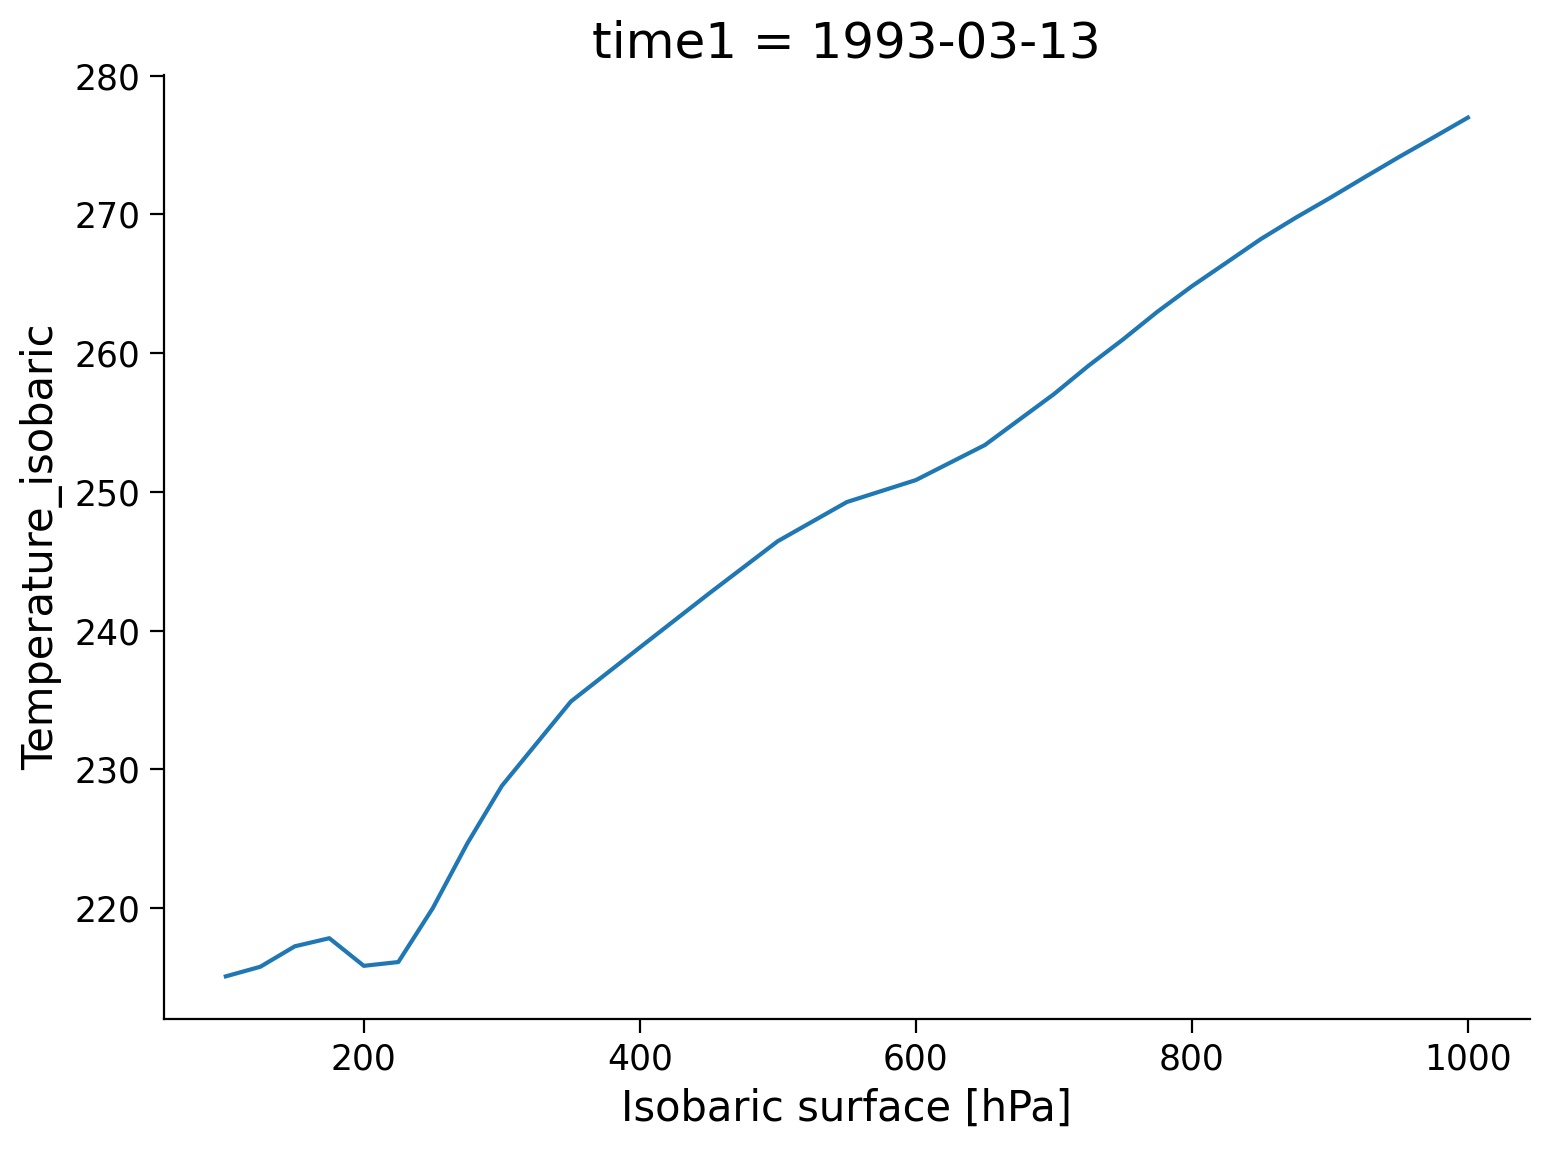

In [19]:
prof.plot()

Here Xarray has generated a line plot of the temperature data against the coordinate variable `isobaric`. Also, the metadata are used to auto-generate axis labels and units.

Consider the following questions:

- What isobaric pressure corresponds to Earth's surface?
- How does temperature change with increasing altitude in the atmosphere?

It might be a bit difficult to answer these questions with our current plot, so let's try customizing our figure to present the data clearer.


## Section 2.2: Customizing the Plot

As in Pandas, the [`.plot()`](https://docs.xarray.dev/en/latest/generated/xarray.DataArray.plot.html) method is mostly just a wrapper to Matplotlib, so we can customize our plot in familiar ways.

In this air temperature profile example, we would like to make two changes:

- swap the axes so that we have isobaric levels on the y-axis (vertical) of the figure (since isobaric levels correspond to altitude)
- make pressure decrease upward in the figure so that up is up (since pressure decreases with altitude)

We can do this by adding a few keyword arguments to our `.plot()`:


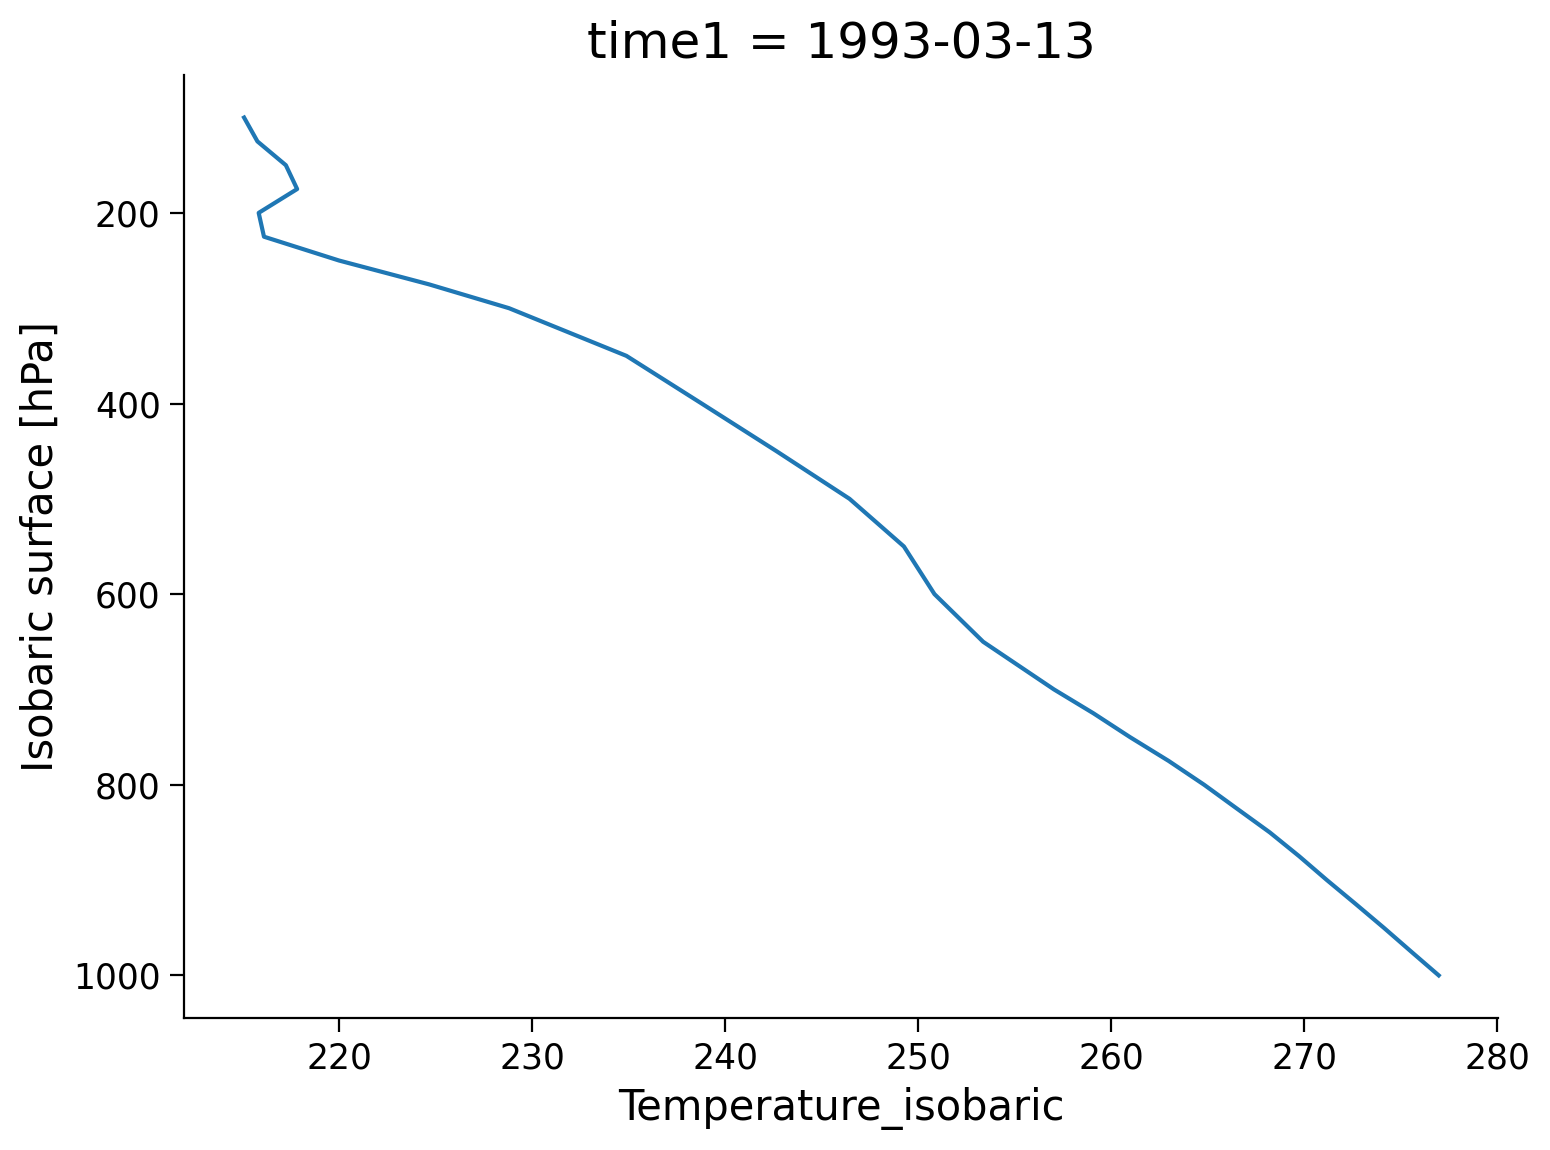

In [20]:
prof.plot(y="isobaric1", yincrease=False)

### Questions 2.2


1. What isobaric pressure corresponds to Earth's surface?
2. Why do you think temperature generally decreases with height?


[*Click for solution*](https://github.com/neuromatch/climate-course-content/tree/main/tutorials/W1D1_ClimateSystemOverview/solutions/W1D1_Tutorial3_Solution_6605983a.py)



In [21]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Questions_2_2")

## Section 2.3: Plotting 2D Data

In the example above, the `.plot()` method produced a line plot.

What if we call `.plot()` on a 2D array? Let's try plotting the temperature data from the 1000 hPa isobaric level (surface temperature) for all x and y values:


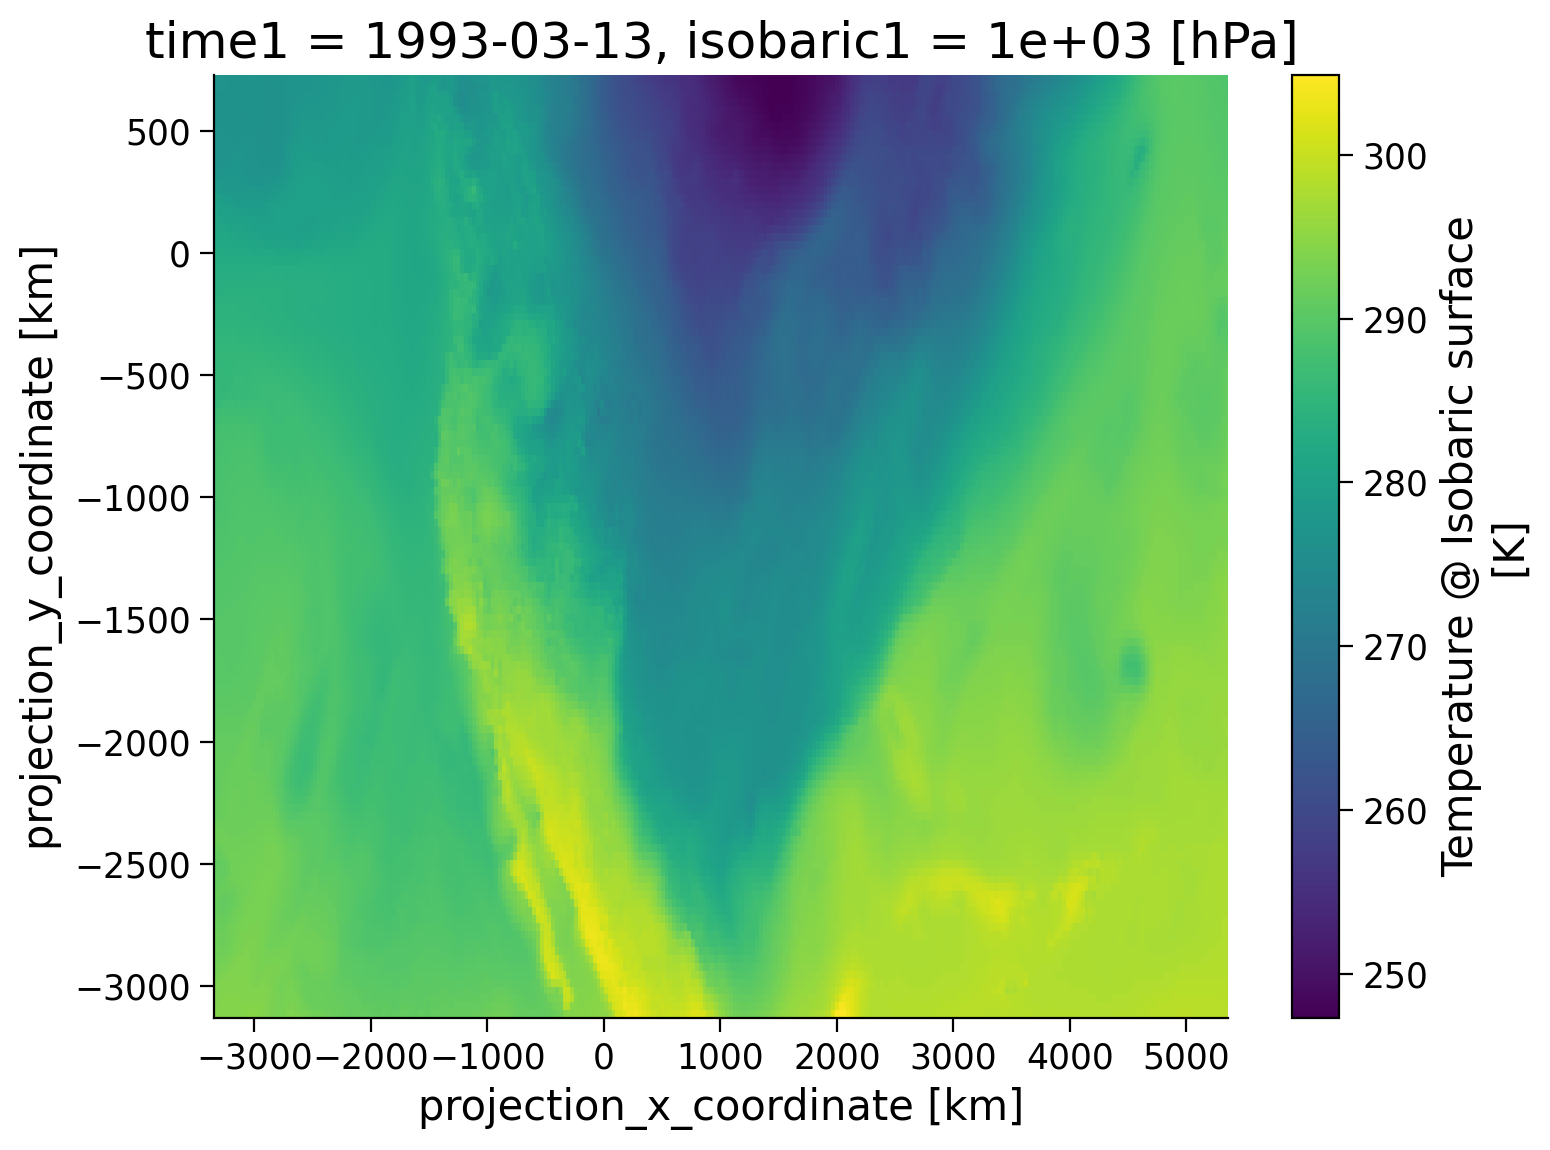

In [22]:
temps.sel(isobaric1=1000).plot()

Xarray has recognized that the `DataArray` object calling the plot method has two coordinate variables, and generates a 2D plot using the `.pcolormesh()` method from Matplotlib.

In this case, we are looking at air temperatures on the 1000 hPa isobaric surface over North America. Note you could improve this figure further by using [Cartopy](https://foundations.projectpythia.org/core/cartopy.html) to handle the map projection and geographic features.


### Questions 2.3: Climate Connection

1. The map you made shows the temperature across the United States at the 1000 hPa level of the atmosphere. How do you think temperatures at the 500 hPa level would compare? What might be causing the spatial differences in temperature seen in the map?


[*Click for solution*](https://github.com/neuromatch/climate-course-content/tree/main/tutorials/W1D1_ClimateSystemOverview/solutions/W1D1_Tutorial3_Solution_1c4e9001.py)



In [23]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Questions_2_3")

# Summary

Xarray brings the joy of Pandas-style labeled data operations to N-dimensional data. As such, it has become a central workhorse in the geoscience community for analyzing gridded datasets. Xarray allows us to open self-describing NetCDF files and make full use of the coordinate axes, labels, units, and other metadata. By utilizing labeled coordinates, our code becomes simpler to write, easier to read, and more robust.


# Resources


Code and data for this tutorial is based on existing content from [Project Pythia](https://foundations.projectpythia.org/core/xarray/xarray-intro.html).
